In [17]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import make_chunks
import numpy as np
import sklearn.externals
import joblib as job

In [22]:
def features_extraction():
    pass

In [23]:
def train_hmm():
    pass

Original Damavandi 2.ogg


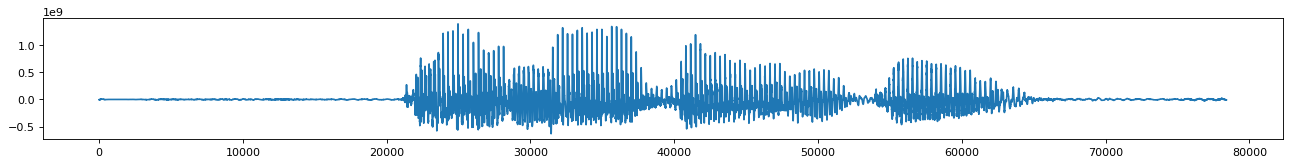

Remove Silence Damavandi 2.ogg


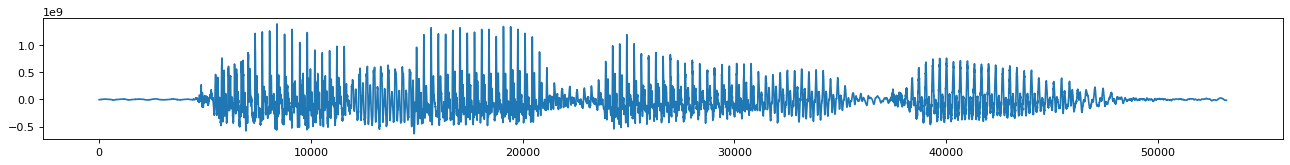

Original Damavandi 3.ogg


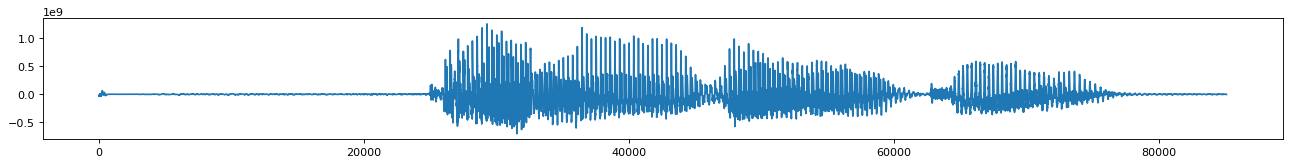

Remove Silence Damavandi 3.ogg


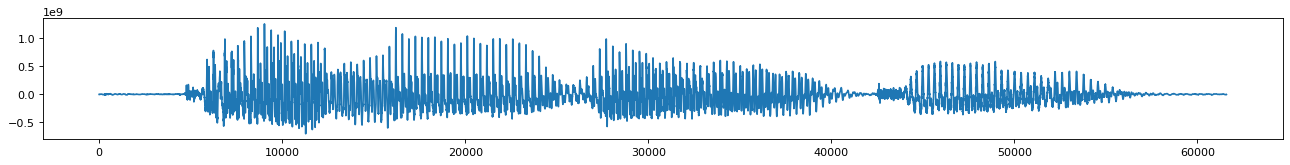

Original Damavandi 1.ogg


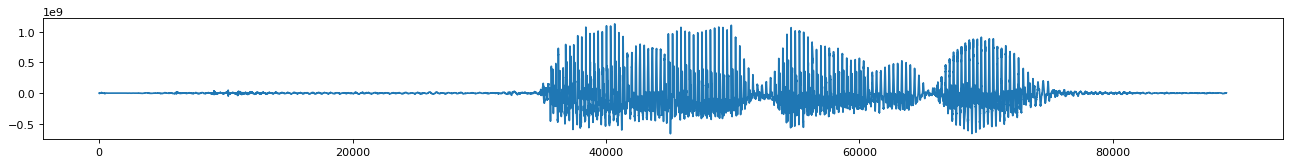

Remove Silence Damavandi 1.ogg


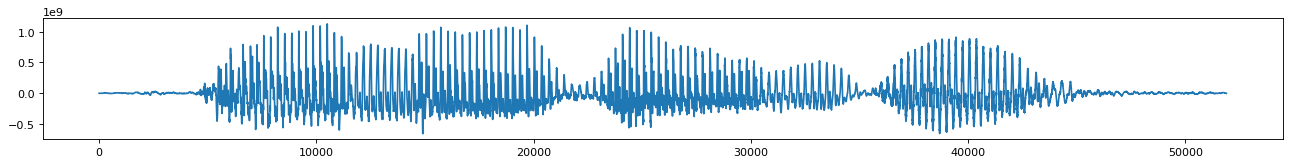

Original Damavandi 4.ogg


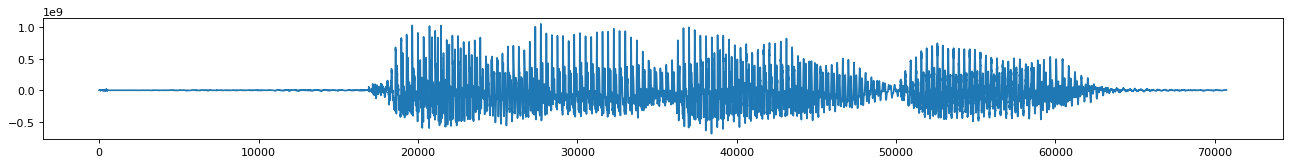

Remove Silence Damavandi 4.ogg


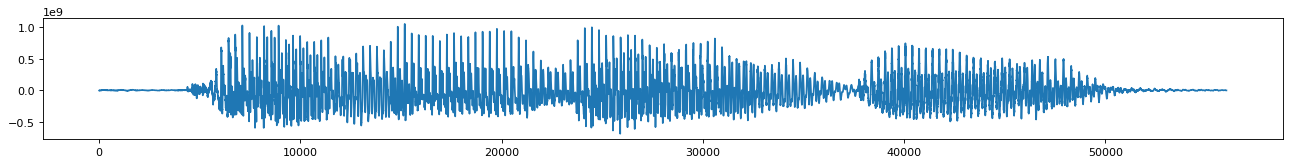

Original Damavandi 5.ogg


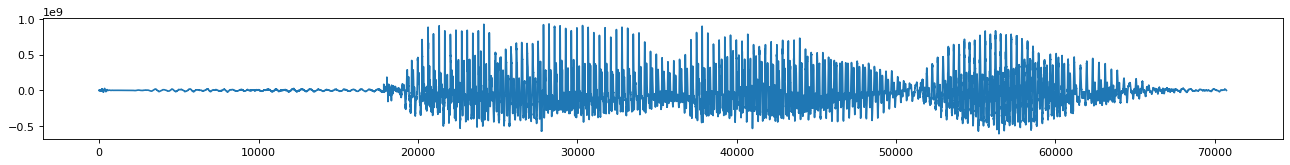

Remove Silence Damavandi 5.ogg


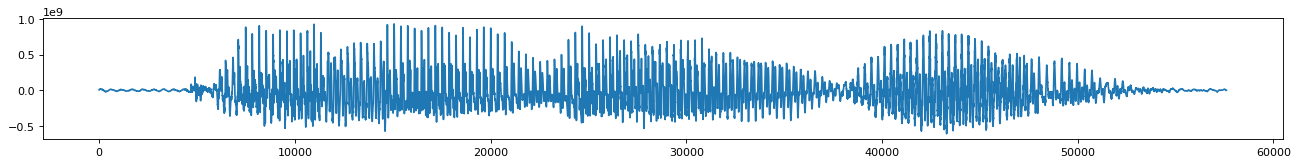

In [24]:
audios_raw_dir_path = "audios/orgin_audios/damavandi"
audios_remove_silence_dir_path = "audios/remove_silence/damavandi"

for file in os.listdir(audios_raw_dir_path):
    file_path = os.path.join(audios_raw_dir_path, file)
    audio = AudioSegment.from_file(file_path)
    
    # draw
    print("Original Damavandi", file)
    samples = audio.get_array_of_samples()
    plt.figure(figsize=(20, 2), dpi=80)
    plt.plot(samples)
    plt.show()
    
    # remove silence
    audio_chunks = split_on_silence(audio, min_silence_len = 50, silence_thresh = -45)
    combined_audio = sum(audio_chunks)
    filename = Path(file_path).stem
    output_file_path = os.path.join(audios_remove_silence_dir_path, filename + ".wav")
    combined_audio.export(output_file_path, format="wav", bitrate="32k")

    # draw
    print("Remove Silence Damavandi", file)
    samples = combined_audio.get_array_of_samples()
    plt.figure(figsize=(20, 2), dpi=80)
    plt.plot(samples)
    plt.show()

Original HasanZadeh 2.ogg


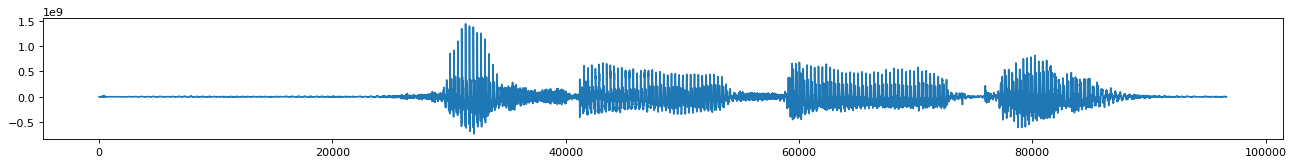

Remove Silence HasanZadeh 2.ogg


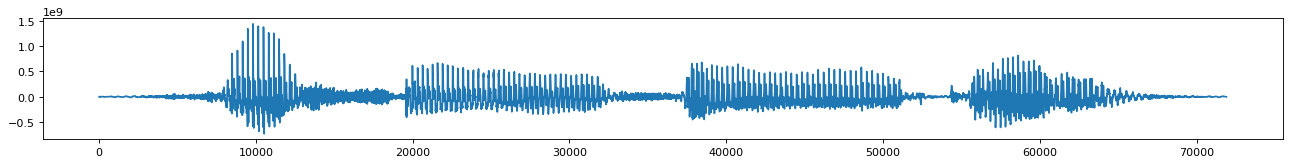

Original HasanZadeh 3.ogg


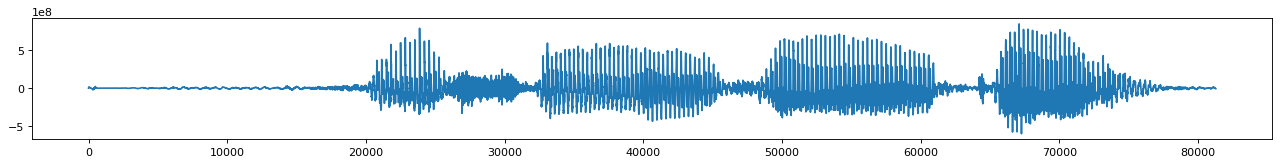

Remove Silence HasanZadeh 3.ogg


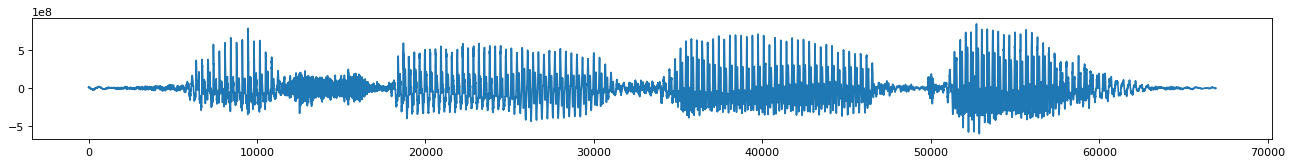

Original HasanZadeh 1.ogg


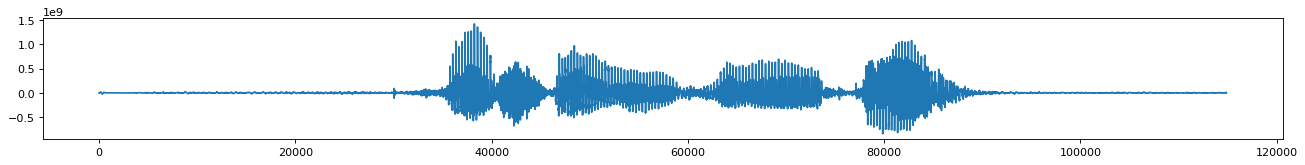

Remove Silence HasanZadeh 1.ogg


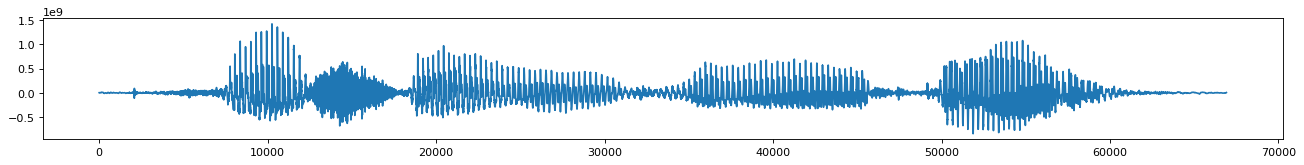

Original HasanZadeh 4.ogg


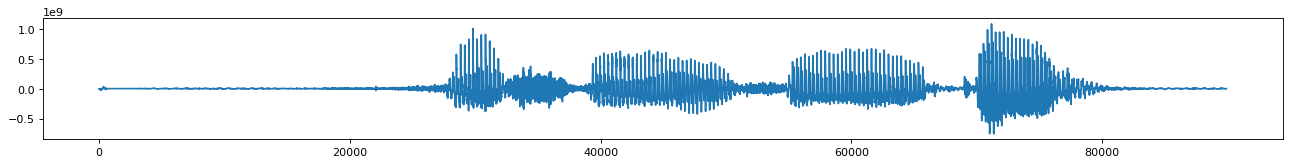

Remove Silence HasanZadeh 4.ogg


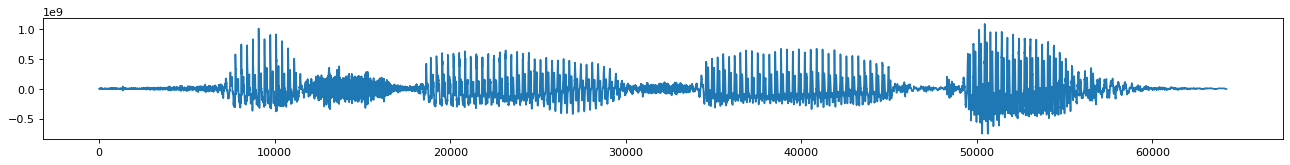

Original HasanZadeh 5.ogg


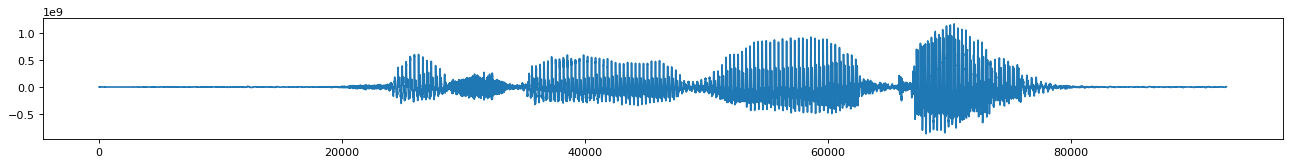

Remove Silence HasanZadeh 5.ogg


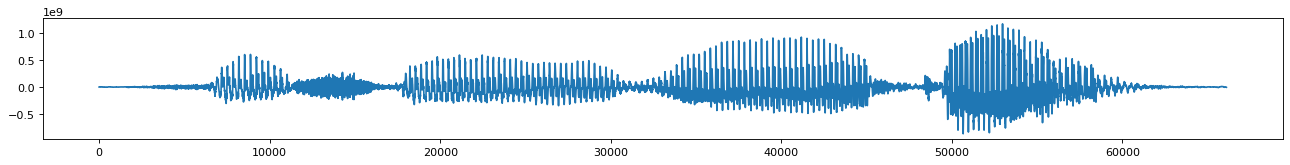

In [25]:
audios_raw_dir_path = "audios/orgin_audios/hasanzadeh"
audios_remove_silence_dir_path = "audios/remove_silence/hasanzadeh"

for file in os.listdir(audios_raw_dir_path):
    file_path = os.path.join(audios_raw_dir_path, file)
    audio = AudioSegment.from_file(file_path)
    
    # draw
    print("Original HasanZadeh", file)
    samples = audio.get_array_of_samples()
    plt.figure(figsize=(20, 2), dpi=80)
    plt.plot(samples)
    plt.show()
    
    # remove silence
    audio_chunks = split_on_silence(audio, min_silence_len = 50, silence_thresh = -45)
    combined_audio = sum(audio_chunks)
    filename = Path(file_path).stem
    output_file_path = os.path.join(audios_remove_silence_dir_path, filename + ".wav")
    combined_audio.export(output_file_path, format="wav", bitrate="32k")

    # draw
    print("Remove Silence HasanZadeh", file)
    samples = combined_audio.get_array_of_samples()
    plt.figure(figsize=(20, 2), dpi=80)
    plt.plot(samples)
    plt.show()

In [26]:
labels = os.listdir("audios/orgin_audios")
labels.remove('.DS_Store') #for macos
print(labels)

['damavandi', 'hasanzadeh']


In [ ]:
audios_dir = "audios/remove_silence"

for label in labels:
    features_train, samples_length = features_extraction(audios_dir, label)
    model = train_hmm(features_train, samples_length)
    job.dump(model + 'models/' + label + '.pkl')